In [2]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
import numpy.polynomial.polynomial as poly
from numpy.polynomial import Polynomial
import scipy.constants as const

In [3]:
#Lines from the excel
raw_lambda = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\Visualizer\Clean lines\Nave list NIR.xlsx")
raw_lambda['Nave list'] = (10**8)/raw_lambda['lambda']
raw_lambda = raw_lambda[raw_lambda['Nave list'].between(3950,9120,inclusive='right')] #Separate the range for use

In [4]:
# Values.to_excel('valores_Nave.xlsx',index=False)
#Save the data before the code

In [5]:
#Data from vizier without treatment
raw_data = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\Visualizer\Datos_prueba.xlsx")

In [6]:
#Lines from the excel
raw_lambda = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\Visualizer\Clean lines\Nave list NIR.xlsx")
raw_lambda['Nave list'] = (10**8)/raw_lambda['lambda']
raw_lambda = raw_lambda[raw_lambda['Nave list'].between(3950,9120,inclusive='right')]
raw_lambda = raw_lambda[raw_lambda['class']=='A'].reset_index(drop=True)

raw_lambda

,lambda,class,Nave list
0,25309.594,A,3951.070886
1,25301.842,A,3952.281419
2,25289.117,A,3954.270131
3,25275.116,A,3956.460576
4,25271.192,A,3957.074918
...,...,...,...
1295,10985.181,A,9103.172720
1296,10981.606,A,9106.136206
1297,10971.236,A,9114.743316
1298,10965.625,A,9119.407239


### Find the minimums and the closer line of the Fe I line


In [7]:
#Find the minimum or the lambda in the spectrum
def find_minimums(wave,flux,lamda):
    #The function find_peaks just got the index of the points
    #The minus if for the minimums, without it are the maximums
    minimums,_ = find_peaks(-flux) 
    mindf = pd.DataFrame([]) #Make a dataframe
    mindf['min_wave'] = wave[minimums]
    mindf['min_flux'] = flux[minimums]

    #Take the closer line with the absolute value of the difference between the minimums and the line
    #This step dont include the closer points that are not minimums
    closer = []
    for each in lamda:
        mindf['abs'] = np.abs(mindf['min_wave']-each)
        closer.append(mindf.loc[mindf['abs'] == min(mindf['abs'])]) #Take all the row

    #Dataframe with the marks for the closer lines of Fe I
    closer_data = pd.concat(closer,axis=0).reset_index(drop=True)
    closer_data['Fe line'] = lamda
    closer_data = closer_data[closer_data['abs'] <= 0.01].reset_index(drop=True)

    return closer_data.drop(['abs'],axis=1)

#Closer lines
closer_lines = find_minimums(raw_data['Wave A'],raw_data['nFlux'],raw_lambda['Nave list'])

closer_lines

,min_wave,min_flux,Fe line


In [8]:
#Localize the line and save the width for lines
def width_minimums(closer_lines,data,width):
    local_points =[]
    for each in closer_lines['min_wave']:
        #This append all the part of the dataframe in that range
        local_points.append(data[data['Wave A'].between(each-width, each+width, inclusive='neither')])

    return local_points


local_points = width_minimums(closer_lines,raw_data,0.05)

local_points

[]

### Filter for the lines using the second derivate

In [10]:
# def Fit_derivates(local_points,closer_lines):
#     values = []
#     fit = []
#     local = []

#     for i in range(0,len(local_points)):

#         data_wave, data_flux = local_points[i]['Wave A'], local_points[i]['nFlux'] #The index i correspond at one line in the lambda_list of lines 

#         #Internal rise, with the mean and std just for the big data (wavenumber)
#         wave_mean, wave_std = np.mean(data_wave), np.std(data_wave) 
#         wave_scaled = (data_wave - wave_mean)/wave_std if wave_std != 0 else data_wave #take the conditional for the division in zero

#         #Polynomial Fit is better for numerical aproximation than polyfit
#         pol = Polynomial.fit(wave_scaled, data_flux, 4)

#         #Scaled coeficients of fit
#         param = pol.convert().coef

#         #Calculate the derivates without evaluate the point, polyder takes the derivate of the polinomium
#         d_param = poly.polyder(param) #First
#         d2_param = poly.polyder(d_param) #Second

#         flux_fit = poly.polyval(wave_scaled,param) #Evaluate the fit

#         #First condition: The parameter of the order two polynomium need to be positive.
#         #Second condition (for eliminate lineal terms): The distance between the initial and the final point need to be less than the half of depth
#         #In other words, the final point need to be higher than the half of the distance between extreme points
  
#         if d2_param[0]>0 and (data_flux.iloc[-1])>=(np.abs(data_flux.iloc[0]-data_flux.iloc[-1])/2):
    
#             values.append(pd.DataFrame([[closer_lines['Fe line'].iloc[i],closer_lines['min_wave'].iloc[i],closer_lines['min_flux'].iloc[i]]])) 
#             fit.append(flux_fit)
#             local.append(local_points[i])

#     Values = pd.concat(values,axis=0).reset_index(drop=True)

#     Values.columns = ["Line Fe I",'min_wave','min_flux']

#     return Values,fit,local

# Values,fit,local = Fit_derivates(local_points,closer_lines)

# Values

In [ ]:
# Values.to_excel('valores_NIR_prueba.xlsx',index=False)

## Visualizer for the Fe I lines one by one

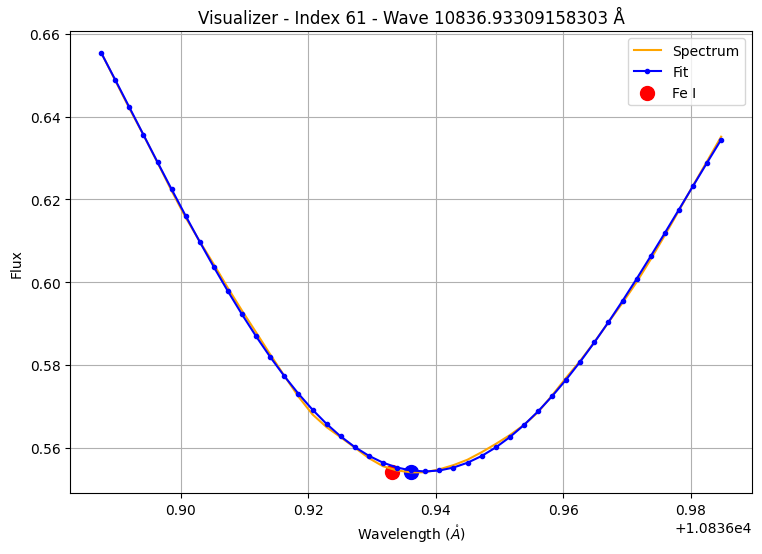

In [ ]:
# import tkinter as tk
# from tkinter import ttk
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
# import numpy as np

# class OutlierViewer:
#     def __init__(self, root, local_points, values,fit):
#         self.root = root
#         self.root.title("Visualizer of Fe I lines identification")
#         self.local_points = local_points
#         self.values = values
#         self.fit = fit
#         self.index = values.index.values
#         self.current_index = 0
       
#         self.setup_ui()
#         self.update_plot()
    
#     def setup_ui(self):
#         main_frame = ttk.Frame(self.root, padding="10")
#         main_frame.pack(fill=tk.BOTH, expand=True)
        
#         control_frame = ttk.Frame(main_frame)
#         control_frame.pack(fill=tk.X, pady=10)
        
#         ttk.Label(control_frame, text="Index of the line:").pack(side=tk.LEFT, padx=5)
#         self.slider = ttk.Scale(
#             control_frame,
#             from_=0,
#             to=len(self.index)-1,
#             orient=tk.HORIZONTAL,
#             command=self.on_slider_move
#         )
#         self.slider.pack(side=tk.LEFT, expand=True, fill=tk.X, padx=5)
        
#         self.spinbox = ttk.Spinbox(
#             control_frame,
#             from_=0,
#             to=len(self.index)-1,
#             width=5,
#             command=self.on_spinbox_change
#         )
#         self.spinbox.pack(side=tk.LEFT, padx=5)
#         self.spinbox.bind("<Return>", self.on_spinbox_change)
        
#         nav_frame = ttk.Frame(control_frame)
#         nav_frame.pack(side=tk.LEFT, padx=10)
        
#         ttk.Button(nav_frame, text="← Last", command=self.prev_plot).pack(side=tk.LEFT)
#         ttk.Button(nav_frame, text="Next →", command=self.next_plot).pack(side=tk.LEFT, padx=5)
     
#         graph_frame = ttk.Frame(main_frame)
#         graph_frame.pack(fill=tk.BOTH, expand=True)
       
#         self.fig, self.ax = plt.subplots(figsize=(10, 6))
#         self.canvas = FigureCanvasTkAgg(self.fig, master=graph_frame)
#         self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
#         self.toolbar = NavigationToolbar2Tk(self.canvas, graph_frame)
#         self.toolbar.update()
#         self.canvas._tkcanvas.pack(fill=tk.BOTH, expand=True)
    
#     def on_slider_move(self, event=None):
#         self.current_index = int(float(self.slider.get()))
#         self.spinbox.delete(0, tk.END)
#         self.spinbox.insert(0, str(self.current_index))
#         self.update_plot()
    
#     def on_spinbox_change(self, event=None):
#         try:
#             new_index = int(self.spinbox.get())
#             if 0 <= new_index < len(self.index):
#                 self.current_index = new_index
#                 self.slider.set(self.current_index)
#                 self.update_plot()
#         except ValueError:
#             pass
    
#     def prev_plot(self):
#         if self.current_index > 0:
#             self.current_index -= 1
#             self.slider.set(self.current_index)
#             self.spinbox.delete(0, tk.END)
#             self.spinbox.insert(0, str(self.current_index))
#             self.update_plot()
    
#     def next_plot(self):
#         if self.current_index < len(self.index)-1:
#             self.current_index += 1
#             self.slider.set(self.current_index)
#             self.spinbox.delete(0, tk.END)
#             self.spinbox.insert(0, str(self.current_index))
#             self.update_plot()
    
#     #Graficas
#     def update_plot(self):
#         j = self.current_index
#         self.ax.clear()
        
#         # Gráfica principal
#         self.ax.plot(
#             self.local_points[j]['Wave A'],
#             self.local_points[j]['nFlux'],
#             color='orange',
#             label='Spectrum'
#         )
        
#         #Closer lines
#         self.ax.plot(
#             self.local_points[j]['Wave A'],
#             self.fit[j],
#             color='blue',
#             label='Fit',
#             marker='.',
#         )
        
#         #Fe I line
#         self.ax.scatter(
#             self.values["Line Fe I"][j],
#             self.values['min_flux'][j],
#             color='red',
#             label='Fe I',
#             s=100
#         )

#         #Fe I line
#         self.ax.scatter(
#             self.values['min_wave'][j],
#             self.values["min_flux"][j],
#             color='blue',
#             s=100
#         )
        
#         #Vainitas del gráfico
#         self.ax.set_title(f'Visualizer - Index {self.index[j]} - Wave {self.values["Line Fe I"][j]} Å')
#         self.ax.set_xlabel(r'Wavelength $(\mathring{A})$')
#         self.ax.set_ylabel('Flux')
#         self.ax.legend()
#         self.ax.grid(True)
        
#         self.canvas.draw()


# if __name__ == "__main__":
#     root = tk.Tk()
#     root.geometry("900x700")
    
    
#     app = OutlierViewer(root, local, Values,fit)

#     root.mainloop()

## Visualizer for the check with the derivates

In [11]:
#Lines from the excel file
raw_lambda = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Project\IAG Solar Flux Atlas\Infrared range\Data\new_values_fe.xlsx")

raw_lambda

,Nave list
0,10035.6094
1,10067.8047
2,10084.1584
3,10087.8409
4,10092.5415
...,...
186,17688.7397
187,17775.9796
188,20722.6098
189,21254.7576


### Find the minimums and the closer line of the Fe I line


In [12]:
#Find the minimum or the lambda in the spectrum
def find_minimums(wave,flux,lamda):
    #The function find_peaks just got the index of the points
    #The minus if for the minimums, without it are the maximums
    minimums,_ = find_peaks(-flux) 
    mindf = pd.DataFrame([]) #Make a dataframe
    mindf['min_wave'] = wave[minimums]
    mindf['min_flux'] = flux[minimums]

    #Take the closer line with the absolute value of the difference between the minimums and the line
    #This step dont include the closer points that are not minimums
    closer = []
    for each in lamda:
        mindf['abs'] = np.abs(mindf['min_wave']-each)
        closer.append(mindf.loc[mindf['abs'] == min(mindf['abs'])]) #Take all the row

    #Dataframe with the marks for the closer lines of Fe I
    closer_data = pd.concat(closer,axis=0).reset_index(drop=True)
    closer_data['Fe line'] = lamda

    return closer_data.drop(['abs'],axis=1)


closer_lines = find_minimums(raw_data['Wave A'],raw_data['nFlux'],raw_lambda['Nave list'])

closer_lines

,min_wave,min_flux,Fe line
0,10035.604601,0.942222,10035.6094
1,10067.811226,0.611177,10067.8047
2,10084.158793,0.956740,10084.1584
3,10087.835211,0.968803,10087.8409
4,10092.540490,0.956926,10092.5415
...,...,...,...
186,10999.947482,0.939151,17688.7397
187,10999.947482,0.939151,17775.9796
188,10999.947482,0.939151,20722.6098
189,10999.947482,0.939151,21254.7576


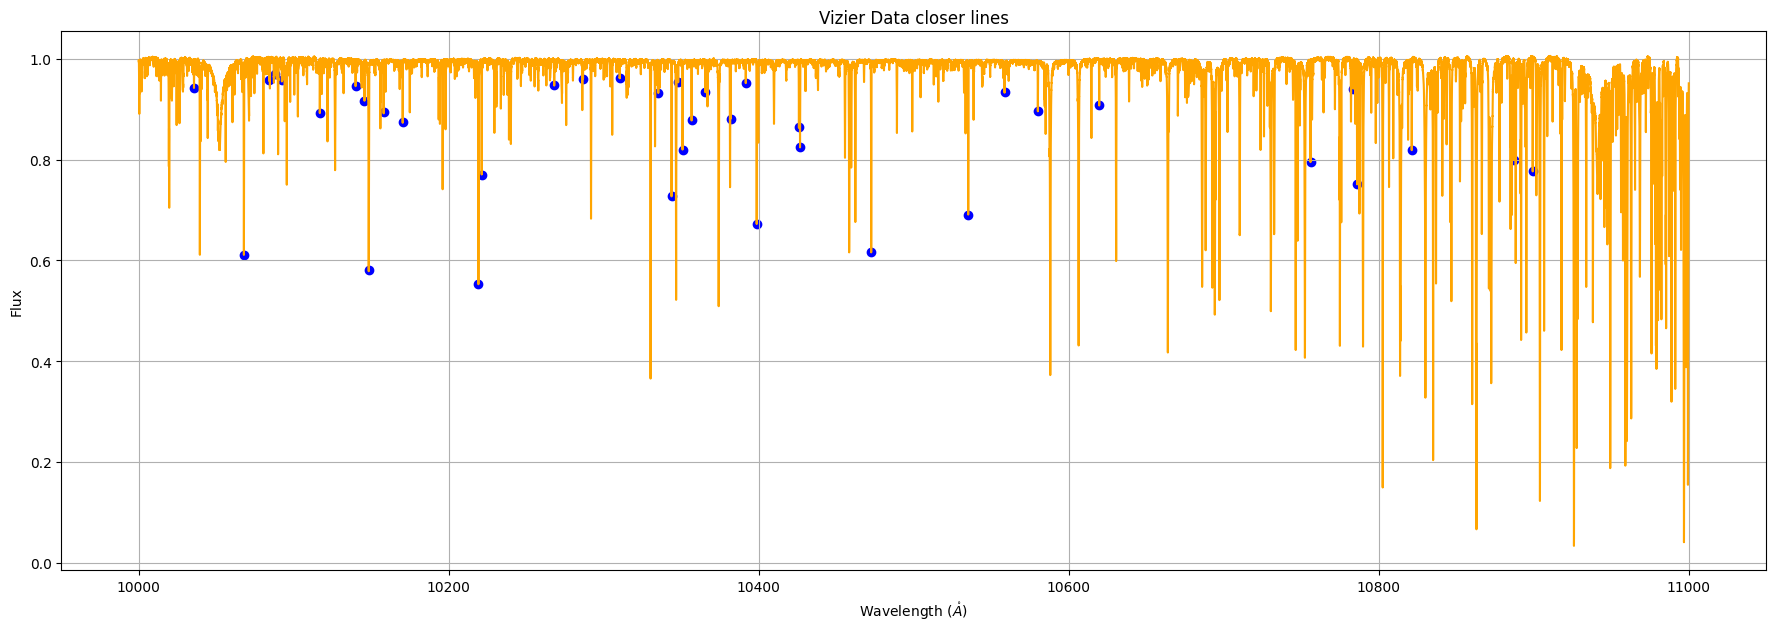

In [13]:
#Plot the identified lines
data_10000_11000 = raw_data[raw_data['Wave A'].between(10000, 11000, inclusive='neither')].reset_index(drop=True)
closer_lines_10000_11000 = closer_lines[closer_lines['Fe line'].between(10000, 11000, inclusive='neither')].reset_index(drop=True)

fig2, ax = plt.subplots(1,1,figsize=(22,7))
ax.plot(data_10000_11000['Wave A'],data_10000_11000['nFlux'], color='orange')
ax.scatter(closer_lines_10000_11000['min_wave'],closer_lines_10000_11000['min_flux'], color='blue')
ax.set_title('Vizier Data closer lines')
ax.set_xlabel(r'Wavelength $(\mathring{A})$')
ax.set_ylabel('Flux')
ax.grid()

In [14]:
#Localize the line and save the width for lines
def width_minimums(closer_lines,data,width):
    local_points =[]
    for each in closer_lines['min_wave']:
        #This append all the part of the dataframe in that range
        local_points.append(data[data['Wave A'].between(each-width, each+width, inclusive='neither')])

    return local_points


local_points = width_minimums(closer_lines,raw_data,0.05)


### Derivates and fit

In [15]:
def Fit_derivates(local_points,lamda_list):
    values = []
    fit = []

    for i in range(0,len(local_points)):

        data_wave, data_flux = local_points[i]['Wave A'], local_points[i]['nFlux'] #The index i correspond at one line in the lambda_list of Fe I lines 

        #Standarization, with the mean and std just for the big data (wavenumber)
        wave_mean, wave_std = np.mean(data_wave), np.std(data_wave) 
        wave_scaled = (data_wave - wave_mean)/wave_std if wave_std != 0 else data_wave #Take the conditional for the division in zero

        #Polynomial Fit is better for numerical aproximation than polyfit
        pol = Polynomial.fit(wave_scaled, data_flux, 4)

        #Scaled coeficients of fit
        param = pol.convert().coef

        #Calculate the derivates without evaluate the point, polyder takes the derivate of the polinomium
        d_param = poly.polyder(param) #First
        d2_param = poly.polyder(d_param) #Second
        d3_param = poly.polyder(d2_param) #Third

        #The fit values
        flux_fit = poly.polyval(wave_scaled,param)

        #Find the minimum with the regression and derivates
        roots = poly.polyroots(d_param).real #Roots or critical points
        valid_roots = np.array([x for x in roots if poly.polyval(x,d2_param)>0] )#Check with the second derivate, just positive values for minimums
        
        if valid_roots.size >0: 

            value_roots = pol(valid_roots) #Evaluate in the polinomium for the global minimum
            minimal_root = valid_roots[np.where(value_roots == min(value_roots))][0] , min(value_roots) #Take the values for the wavelength and the flux of the minimum

            #For the wavelength observed convert the minimal root in the real with the scale of the mean, we dont scale the flux data
            lamda_obs = [round(minimal_root[0]*wave_std + wave_mean,4), minimal_root[1]]

            #Expresion for the third derivate (C-curved profile bisector)
            def Third_Derivate(second, third):
                return -((third)/(3*(second**2)))*(const.c/lamda_obs[0])

            #Evaluate the second and third derivate in the wavelength observed. Re-scalated the coefficients
            d2 = (poly.polyval(minimal_root[0],d2_param) / (wave_std ** 2))*(lamda_obs[0]**2) #Core curvature
            d3 = -(Third_Derivate(d2, poly.polyval(minimal_root[0],d3_param) / (wave_std ** 3) ))*(const.c/lamda_obs[0]) #Bisector slope

            #Calculate the velocity and convective blueshift
            blueshift = ((lamda_obs[0]/lamda_list[i]) - 1)* const.c
            velocity = round((blueshift) - 633) #Formula for relativistic aproximation

            #In order: Natural wavelength, observed wavelength, flux, velocity, second derivate, third derivate, convective blueshift
            values.append(pd.DataFrame([[lamda_list[i],lamda_obs[0],lamda_obs[1],velocity,d2,d3,blueshift]])) 

            #Just in case of the visualizer take the fit values
            fit.append(flux_fit)

    Values =  pd.concat(values,axis=0).reset_index(drop=True)

    Values.columns = ["Emitted wavelength", "Observed wavelength", "Flux","Velocity","Core curvature","Bisector slope","Blueshift"]

    return Values,fit

Values,fit = Fit_derivates(local_points,closer_lines['Fe line'])

Values

,Emitted wavelength,Observed wavelength,Flux,Velocity,Core curvature,Bisector slope,Blueshift
0,10035.6094,10035.6164,0.942566,-424,1.092415e+09,-1.544647e-08,209.110092
1,10067.8047,10067.8169,0.611079,-270,5.206249e+09,1.802525e-09,363.283565
2,10084.1584,10084.1685,0.956635,-333,1.039917e+09,-9.262597e-09,300.263414
3,10087.8409,10087.8493,0.967970,-383,6.806769e+08,-2.270661e-08,249.632867
4,10092.5415,10092.5375,0.957501,-752,5.799208e+08,2.077866e-08,-118.817429
5,10116.7892,10116.7970,0.892116,-402,2.487723e+09,-5.983817e-09,231.138667
6,10139.8807,10139.8825,0.945588,-580,1.164348e+09,-1.576064e-08,53.218222
7,10145.6242,10145.6287,0.916580,-500,1.427904e+09,2.138957e-09,132.970238
8,10148.3444,10148.3569,0.578729,-264,4.861451e+09,2.678436e-09,369.262766
9,10157.9490,10157.9565,0.892290,-412,2.369788e+09,-4.266898e-09,221.348171


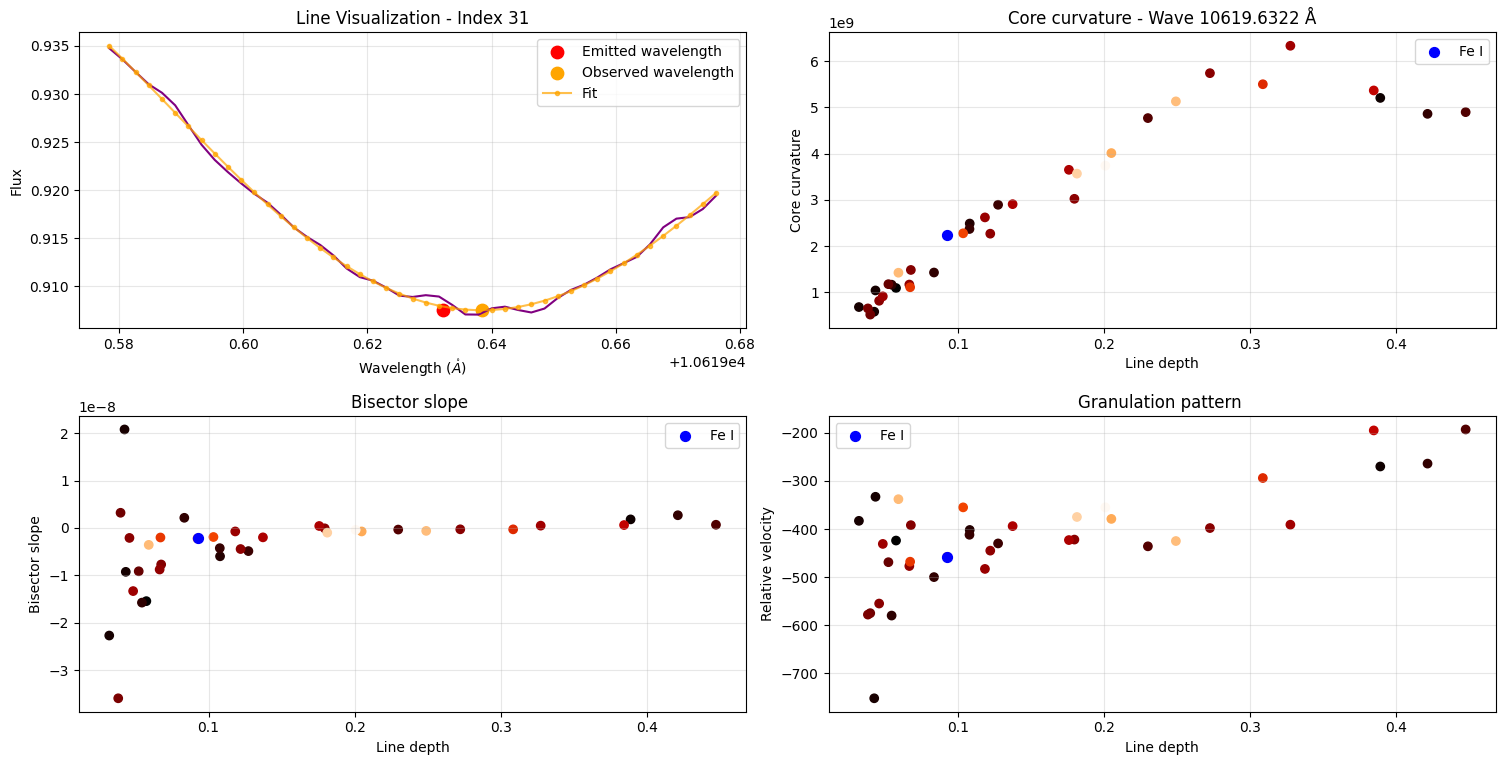

In [ ]:
# import tkinter as tk
# from tkinter import ttk
# import matplotlib.pyplot as plt
# from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg, NavigationToolbar2Tk
# import numpy as np

# class OutlierViewer:
#     def __init__(self, root, local_points, values, fit):
#         self.root = root
#         self.root.title("Visualizer of Fe I lines identification")
#         self.local_points = local_points
#         self.values = values
#         self.fit = fit
#         self.index = values.index.values
#         self.current_index = 0
       
#         self.setup_ui()
#         self.update_plot()
    
#     def setup_ui(self):
#         main_frame = ttk.Frame(self.root, padding="10")
#         main_frame.pack(fill=tk.BOTH, expand=True)
        
#         control_frame = ttk.Frame(main_frame)
#         control_frame.pack(fill=tk.X, pady=10)
        
#         ttk.Label(control_frame, text="Index of the line:").pack(side=tk.LEFT, padx=5)
#         self.slider = ttk.Scale(
#             control_frame,
#             from_=0,
#             to=len(self.index)-1,
#             orient=tk.HORIZONTAL,
#             command=self.on_slider_move
#         )
#         self.slider.pack(side=tk.LEFT, expand=True, fill=tk.X, padx=5)
        
#         self.spinbox = ttk.Spinbox(
#             control_frame,
#             from_=0,
#             to=len(self.index)-1,
#             width=5,
#             command=self.on_spinbox_change
#         )
#         self.spinbox.pack(side=tk.LEFT, padx=5)
#         self.spinbox.bind("<Return>", self.on_spinbox_change)
        
#         nav_frame = ttk.Frame(control_frame)
#         nav_frame.pack(side=tk.LEFT, padx=10)
        
#         ttk.Button(nav_frame, text="← Last", command=self.prev_plot).pack(side=tk.LEFT)
#         ttk.Button(nav_frame, text="Next →", command=self.next_plot).pack(side=tk.LEFT, padx=5)
     
#         graph_frame = ttk.Frame(main_frame)
#         graph_frame.pack(fill=tk.BOTH, expand=True)
       
#         # Crear figura con dos subplots
#         self.fig, self.axs = plt.subplots(2, 2, figsize=(20, 14))
#         self.ax1, self.ax2,self.ax3, self.ax4 = self.axs.flat
#         self.canvas = FigureCanvasTkAgg(self.fig, master=graph_frame)
#         self.canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)
        
#         self.toolbar = NavigationToolbar2Tk(self.canvas, graph_frame)
#         self.toolbar.update()
#         self.canvas._tkcanvas.pack(fill=tk.BOTH, expand=True)
    
#     def on_slider_move(self, event=None):
#         self.current_index = int(float(self.slider.get()))
#         self.spinbox.delete(0, tk.END)
#         self.spinbox.insert(0, str(self.current_index))
#         self.update_plot()
    
#     def on_spinbox_change(self, event=None):
#         try:
#             new_index = int(self.spinbox.get())
#             if 0 <= new_index < len(self.index):
#                 self.current_index = new_index
#                 self.slider.set(self.current_index)
#                 self.update_plot()
#         except ValueError:
#             pass
    
#     def prev_plot(self):
#         if self.current_index > 0:
#             self.current_index -= 1
#             self.slider.set(self.current_index)
#             self.spinbox.delete(0, tk.END)
#             self.spinbox.insert(0, str(self.current_index))
#             self.update_plot()
    
#     def next_plot(self):
#         if self.current_index < len(self.index)-1:
#             self.current_index += 1
#             self.slider.set(self.current_index)
#             self.spinbox.delete(0, tk.END)
#             self.spinbox.insert(0, str(self.current_index))
#             self.update_plot()
    
#     def update_plot(self):
#         j = self.current_index
        
#         self.ax1.clear()
#         self.ax2.clear()
#         self.ax3.clear()
#         self.ax4.clear()
        
#         #Plot 1
#         # Fe I line
#         self.ax1.plot(self.local_points[j]['Wave A'],
#                      self.local_points[j]['nFlux'],
#                      c='purple')

#         self.ax1.scatter(
#             self.values['Emitted wavelength'].iloc[j],
#             self.values["Flux"].iloc[j],
#             color='red',
#             s=80,
#             label='Emitted wavelength'
#         )

#         self.ax1.scatter(
#             self.values['Observed wavelength'].iloc[j],
#             self.values["Flux"].iloc[j],
#             color='orange',
#             s=80,
#             label='Observed wavelength'
#         )

#         # Fit
#         self.ax1.plot(self.local_points[j]['Wave A'],
#                      self.fit[j],
#                      c='orange',
#                      marker='.',
#                      label='Fit',
#                      alpha=0.7)
        
#         self.ax1.set_title(f'Line Visualization - Index {self.index[j]}')
#         self.ax1.set_xlabel(r'Wavelength $(\mathring{A})$')
#         self.ax1.set_ylabel('Flux')
#         self.ax1.grid(True, alpha=0.3)
#         self.ax1.legend()
        
#          # Plot 2
#         self.ax2.scatter(1-self.values['Flux'],
#                         self.values['Core curvature'],
#                         c=self.values["Observed wavelength"],
#                         cmap='gist_heat',lw=1)
        
#         #Fe I line
#         self.ax2.scatter(
#             1-self.values['Flux'].iloc[j],
#             self.values['Core curvature'].iloc[j],
#             color='blue',
#             label='Fe I',
#             s=50
#         )
        
        
#         self.ax2.set_title(f'Core curvature - Wave {self.values["Emitted wavelength"].iloc[j]} Å')
#         self.ax2.set_xlabel(r'Line depth')
#         self.ax2.set_ylabel('Core curvature')
#         self.ax2.grid(True, alpha=0.3)
#         self.ax2.legend()
        
#         # Plot 3
#         self.ax3.scatter(1-self.values['Flux'],
#                         self.values['Bisector slope'],
#                         c=self.values["Observed wavelength"],
#                         cmap='gist_heat',lw=1)
        
#         #Fe I line
#         self.ax3.scatter(
#             1-self.values['Flux'].iloc[j],
#             self.values['Bisector slope'].iloc[j],
#             color='blue',
#             label='Fe I',
#             s=50
#         )
        
        
#         self.ax3.set_title(f'Bisector slope ')
#         self.ax3.set_xlabel(r'Line depth')
#         self.ax3.set_ylabel('Bisector slope')
#         self.ax3.grid(True, alpha=0.3)
#         self.ax3.legend()

#         # Plot 4
#         self.ax4.scatter(1-self.values['Flux'],
#                         self.values['Velocity'],
#                         c=self.values["Observed wavelength"],
#                         cmap='gist_heat',lw=1)
#         # 
#         #Fe I line
#         self.ax4.scatter(
#             1-self.values['Flux'].iloc[j],
#             self.values['Velocity'].iloc[j],
#             color='blue',
#             label='Fe I',
#             s=50
#         )
        
        
#         self.ax4.set_title(f'Granulation pattern ')
#         self.ax4.set_xlabel(r'Line depth')
#         self.ax4.set_ylabel('Relative velocity')
#         self.ax4.grid(True, alpha=0.3)
#         self.ax4.legend()

#         self.fig.tight_layout()
        
#         self.canvas.draw()


# if __name__ == "__main__":
#     root = tk.Tk()
#     root.geometry("1200x700") 
    
#     app = OutlierViewer(root, local_points, Values, fit)
#     root.mainloop()

## Lines to drop in the excel

In [ ]:
# index_to_drop = [0,1,2,14,15,22,23,29,37,38,47,48,49,50,51,53,54,55,
#                  58,60,64,65,69,70,71,72,73,74,75,80,83,84,85,89,90,95,
#                  97,98,101,102,104,106,116,117,118,119,120,121,129,134,
#                  138,142,145,146,148,150,157,163,168,169,176,178,180,183,
#                  188,195,203,205,209,211,215,219,222,223,227,232,236,237,
#                  242,243,244,245,247,248,249,252,259,261,269,273,276,277,
#                  278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,
#                  295,296,298,301,302,303,304,305,306,307,308,309,310,311,312,313]

# Values = Values.drop(index_to_drop).reset_index(drop=True)

# Values

In [ ]:

#Convert to excel
# Values.to_excel('valores vacio Nave NIR_ultima.xlsx', index=False)

In [ ]:
# #Lines from the excel
# raw_lambda = pd.read_excel(r"C:\Users\clauw\Documents\Programming\Final-Project\Visualizer\Clean lines\Nave list NIR.xlsx")
# raw_lambda['Nave list'] = (10**8)/raw_lambda['lambda']
# raw_lambda = raw_lambda[raw_lambda['Nave list'].between(10000,23000,inclusive='right')]
# raw_lambda = raw_lambda[raw_lambda['class']=='A'].reset_index(drop=True)

# raw_lambda

,lambda,class,Nave list
0,9977.511,A,10022.539690
1,9975.027,A,10025.035521
2,9971.253,A,10028.829877
3,9964.517,A,10035.609353
4,9955.970,A,10044.224721
...,...,...,...
1849,4378.553,A,22838.595308
1850,4375.952,A,22852.170225
1851,4368.958,A,22888.752879
1852,4354.970,A,22962.270693


In [ ]:
# round(raw_lambda[raw_lambda['Nave list'].between(17165,17180)],4)

,lambda,class,Nave list
1310,5825.538,A,17165.7965
1311,5823.811,A,17170.8869
